## Model Experimentation

### Running and loading the prepared datasets

In [4]:
import sys
sys.path.append('../src/')

from dataFunctions import load_dataframe
from globalVars import AWS_S3_CLEAN_DATA_DIRECTORY

filepath = AWS_S3_CLEAN_DATA_DIRECTORY + "/" + "clean_data_010623.csv"

clean_df = load_dataframe(filepath)


In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

features, target = clean_df.drop(columns="TARGET"), clean_df["TARGET"]

# Scaling the training set before splitting the data
scaler = StandardScaler()
features[features.columns] = scaler.fit_transform(features[features.columns])

# Load X and y with values
X, y = features.values, target.values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=420
)

In [7]:
print("Shape of X_train and y_train:", X_train.shape, y_train.shape)
print("Shape of X_test and y_test:", X_test.shape, y_test.shape)

Shape of X_train and y_train: (1130960, 64) (1130960,)
Shape of X_test and y_test: (282741, 64) (282741,)


### Model Functions

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Print Classification report
    print("Classification report:\n",classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
    disp.plot()
    plt.show()

    # Calculate cross-validation score
    cv_score = cross_val_score(model, X_train, y_train, cv=5).mean()

    return cv_score

### Model 1: XGB Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96    258456
           1       0.92      0.06      0.12     24285

    accuracy                           0.92    282741
   macro avg       0.92      0.53      0.54    282741
weighted avg       0.92      0.92      0.89    282741



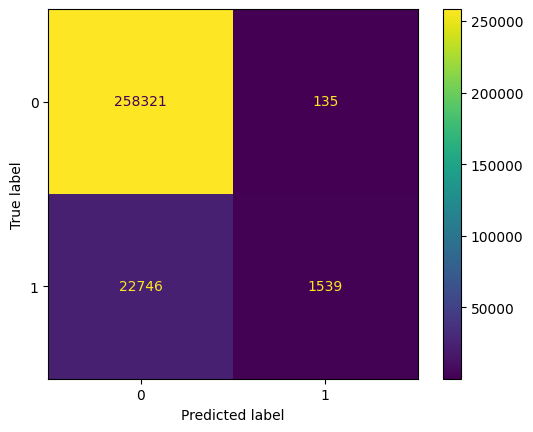

Average Accuracy of XGB Classifier is:  0.9178211430996676


In [9]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier()
xgb_metrics = fit_and_evaluate(xgb_classifier)

print("Average Accuracy of XGB Classifier is: ", xgb_metrics)

### Model 2: Random Forest Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98    258456
           1       1.00      0.50      0.67     24285

    accuracy                           0.96    282741
   macro avg       0.98      0.75      0.82    282741
weighted avg       0.96      0.96      0.95    282741



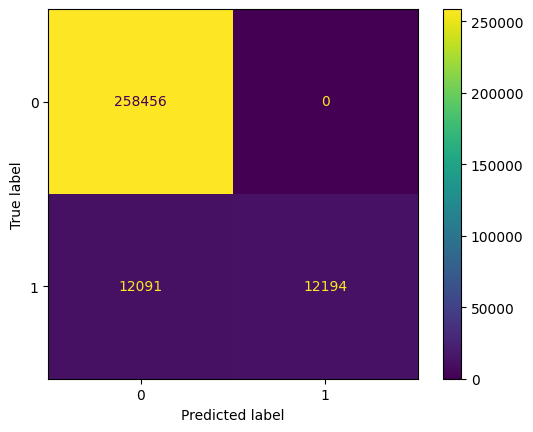

Average Accuracy of XGB Classifier is:  0.9505163754686284


In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_metrics = fit_and_evaluate(rf_classifier)

print("Average Accuracy of Random Forest Classifier is: ", rf_metrics)

In [12]:
print("Average Accuracy of Random Forest Classifier is: ", rf_metrics)

Average Accuracy of Random Forest Classifier is:  0.9505163754686284


### Model 3: Naive-Bayes Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.82      0.87    258456
           1       0.15      0.33      0.21     24285

    accuracy                           0.78    282741
   macro avg       0.54      0.58      0.54    282741
weighted avg       0.86      0.78      0.81    282741



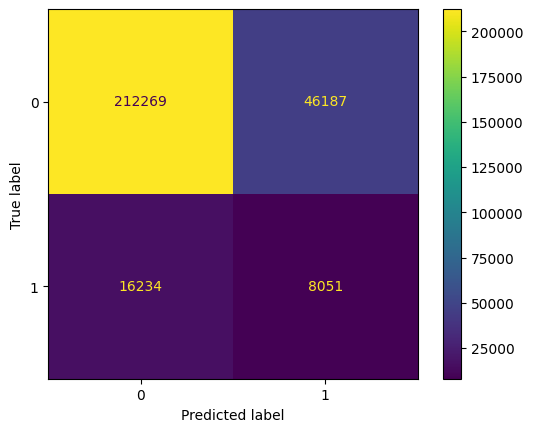

Average Accuracy of Naive-Bayes Classifier is:  0.776533210723633


In [11]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_metrics = fit_and_evaluate(nb_classifier)

print("Average Accuracy of Naive-Bayes Classifier is: ", nb_metrics)

### Model 4: Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96    258456
           1       0.88      0.00      0.00     24285

    accuracy                           0.91    282741
   macro avg       0.89      0.50      0.48    282741
weighted avg       0.91      0.91      0.87    282741



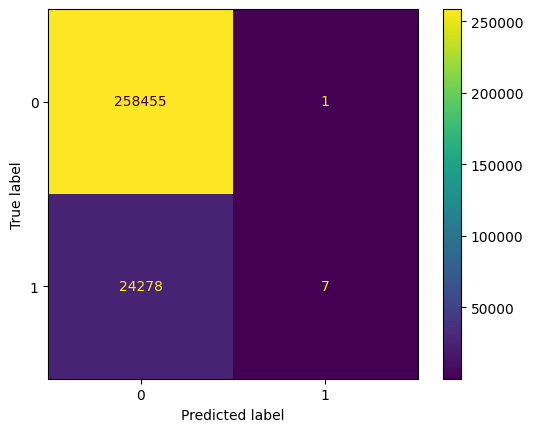

Average Accuracy of Logistic Regression is:  0.9132781000212209


In [13]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=3000)
log_reg_metrics = fit_and_evaluate(log_reg)

print("Average Accuracy of Logistic Regression is: ", log_reg_metrics)

### KNeighbors Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96    258456
           1       0.74      0.36      0.49     24285

    accuracy                           0.93    282741
   macro avg       0.84      0.68      0.73    282741
weighted avg       0.93      0.93      0.92    282741



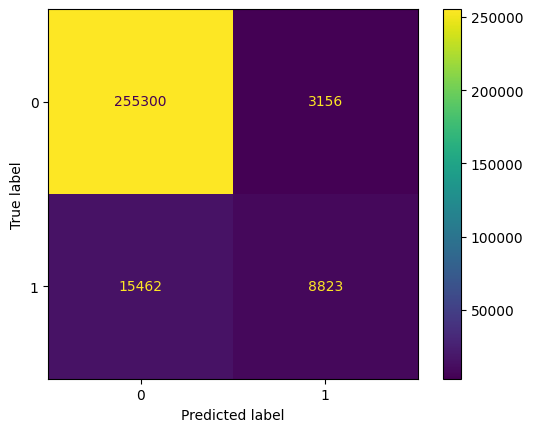

Average Accuracy of KNeighbors Classifier is:  0.9286553016905991


In [14]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_metrics = fit_and_evaluate(knn_classifier)

print("Average Accuracy of KNeighbors Classifier is: ", knn_metrics)
